In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, r2_score

### Stage 1: Data Loading and Preprocessing

In [34]:
# Purpose: Load and prepare the data for analysis ( foundational step for all questions)
def load_and_prepare_data(file_path):
    """Load and preprocess employee data from Excel file."""
    try:
        xls = pd.ExcelFile(file_path)
        employees = pd.read_excel(xls, sheet_name="Employee")
        performance = pd.read_excel(xls, sheet_name="PerformanceRating")
        df = pd.merge(employees, performance, on="EmployeeID", how="left").dropna()
        df = pd.get_dummies(df, drop_first=True)  # One-hot encode categorical variables
        print("📌 Available columns:", df.columns.tolist())
        return df
    except FileNotFoundError:
        print("❌ File not found! Please check the file path.")
        return None
    except Exception as e:
        print(f"❌ Error loading data: {e}")
        return None

### Stage 2: Model Training Functions

In [26]:
# Purpose: Define reusable functions for training models (used across multiple questions)
def train_classification_model(df, features, target, class_weight=None):
    """Train and evaluate a classification model."""
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight=class_weight)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"✅ {target} Model Accuracy: {accuracy:.2f}")
    print(f"📊 {target} Classification Report:\n", report)
    return model

def train_regression_model(df, features, target):
    """Train and evaluate a regression model with non-negative predictions."""
    X = df[features]
    y = df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred = np.maximum(y_pred, 0)  # Ensure non-negative predictions
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"🔍 {target} Mean Absolute Error: {mae:.2f}")
    print(f"🔍 {target} R² Score: {r2:.2f}")
    return model

### Stage 3: Input Validation and Preprocessing

In [6]:
def get_new_employee_data(df, numerical_features, categorical_features, feature_ranges):
    """Collect, validate, and process input data for a new employee with clarified categorical options."""
    print("\n🔹 Enter new employee details:")
    employee_data = {}
    
    # Collect and validate numerical features
    for feature in numerical_features:
        while True:
            try:
                value = float(input(f"{feature}: "))
                if feature in feature_ranges:
                    min_val, max_val = feature_ranges[feature]
                    if min_val <= value <= max_val:
                        employee_data[feature] = value
                        break
                    else:
                        print(f"❌ {feature} must be between {min_val} and {max_val}.")
                else:
                    employee_data[feature] = value
                    break
            except ValueError:
                print("❌ Invalid input. Please enter a number.")
    
    # Collect categorical features with clarifications
    for feature in categorical_features:
        if feature == "OverTime":
            print("OverTime options:")
            print("1. refers to 'Yes'")
            print("2. refers to 'No'")
            while True:
                value = input(f"{feature} (enter 1 or 2): ")
                if value == "1":
                    employee_data[feature] = "Yes"
                    break
                elif value == "2":
                    employee_data[feature] = "No"
                    break
                else:
                    print("❌ Invalid input. Please enter 1 or 2.")
        
        elif feature == "Department":
            print("Department options:")
            print("1. refers to 'Human Resources'")
            print("2. refers to 'Sales'")
            print("3. refers to 'Technology'")
            while True:
                value = input(f"{feature} (enter 1, 2, or 3): ")
                if value == "1":
                    employee_data[feature] = "Human Resources"
                    break
                elif value == "2":
                    employee_data[feature] = "Sales"
                    break
                elif value == "3":
                    employee_data[feature] = "Technology"
                    break
                else:
                    print("❌ Invalid input. Please enter 1, 2, or 3.")
        
        elif feature == "JobRole":
            print("JobRole options:")
            print("1. refers to 'Analytics Manager'")
            print("2. refers to 'Data Scientist'")
            print("3. refers to 'Engineering Manager'")
            print("4. refers to 'HR Business Partner'")
            print("5. refers to 'HR Executive'")
            print("6. refers to 'HR Manager'")
            print("7. refers to 'Machine Learning Engineer'")
            print("8. refers to 'Manager'")
            print("9. refers to 'Recruiter'")
            print("10. refers to 'Sales Executive'")
            print("11. refers to 'Sales Representative'")
            print("12. refers to 'Senior Software Engineer'")
            print("13. refers to 'Software Engineer'")
            while True:
                value = input(f"{feature} (enter 1-13): ")
                role_mapping = {
                    "1": "Analytics Manager", "2": "Data Scientist", "3": "Engineering Manager",
                    "4": "HR Business Partner", "5": "HR Executive", "6": "HR Manager",
                    "7": "Machine Learning Engineer", "8": "Manager", "9": "Recruiter",
                    "10": "Sales Executive", "11": "Sales Representative", "12": "Senior Software Engineer",
                    "13": "Software Engineer"
                }
                if value in role_mapping:
                    employee_data[feature] = role_mapping[value]
                    break
                else:
                    print("❌ Invalid input. Please enter a number between 1 and 13.")
    
    # Create DataFrame and apply one-hot encoding
    employee_df = pd.DataFrame([employee_data])
    employee_df_encoded = pd.get_dummies(employee_df, drop_first=True)
    
    # Align with training data columns
    employee_df_encoded = employee_df_encoded.reindex(columns=df.columns, fill_value=0)
    return employee_df_encoded

## Main Execution

In [7]:
file_path = "HrData.xlsx"
df = load_and_prepare_data(file_path)
if df is None:
    exit()

📌 Available columns: ['Age', 'DistanceFromHome', 'Education', 'Salary', 'StockOptionLevel', 'HireDate', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'TrainingOpportunitiesTaken', 'WorkLifeBalance', 'SelfRating', 'ManagerRating', 'EmployeeID_00A3-2445', 'EmployeeID_00B0-F199', 'EmployeeID_00D4-DD53', 'EmployeeID_00E4-3D60', 'EmployeeID_0145-DBFC', 'EmployeeID_0172-B5D2', 'EmployeeID_017D-0B97', 'EmployeeID_0210-E0D8', 'EmployeeID_022A-0219', 'EmployeeID_0240-4D29', 'EmployeeID_02DA-7A72', 'EmployeeID_0317-B7BC', 'EmployeeID_0322-D46B', 'EmployeeID_03C5-51AD', 'EmployeeID_03D3-AA88', 'EmployeeID_03D9-FF08', 'EmployeeID_03EF-5904', 'EmployeeID_040C-EDED', 'EmployeeID_041A-31B0', 'EmployeeID_04D7-C8F3', 'EmployeeID_04E6-6B61', 'EmployeeID_0592-D909', 'EmployeeID_05B0-755F', 'EmployeeID_05CD-292D', 'EmployeeID_05DA-5423', 'EmployeeID_0

##### Define realistic ranges for input validation

In [8]:
feature_ranges = {
    "Age": (18, 65),
    "Education": (1, 5),
    "YearsAtCompany": (0, 40),
    "YearsInMostRecentRole": (0, 40),
    "YearsWithCurrManager": (0, 40),
    "EnvironmentSatisfaction": (1, 5),
    "JobSatisfaction": (1, 5),
    "RelationshipSatisfaction": (1, 5),
    "WorkLifeBalance": (1, 5),
    "SelfRating": (1, 5),
    "ManagerRating": (1, 5),
    "Salary": (1000, 999999)
}

##### Define input features

In [9]:
##### Define input features
numerical_input_features = [
    "Age", "Education", "YearsAtCompany", "YearsInMostRecentRole",
    "YearsWithCurrManager", "EnvironmentSatisfaction", "JobSatisfaction",
    "RelationshipSatisfaction", "WorkLifeBalance", "SelfRating", "ManagerRating", "Salary"
]
categorical_input_features = ["OverTime", "Department", "JobRole"]

##### Define common features (excluding targets)

In [10]:
##### Define common features (excluding targets)
common_features = [
    "Age", "Education", "YearsInMostRecentRole", "YearsWithCurrManager",
    "EnvironmentSatisfaction", "RelationshipSatisfaction", "WorkLifeBalance",
    "SelfRating", "ManagerRating"
]

---
### Stage 4: Question-Specific Code

> Question 1: Which employees are likely to leave?

> Question 3: What is the likelihood that an employee will leave the company based on their data (e.g., age, job role, years of service, salary, etc.)?


In [11]:
if "Attrition_Yes" in df.columns:
    turnover_features = common_features + ["Salary", "OverTime_Yes"]
    turnover_model = train_classification_model(df, turnover_features, "Attrition_Yes", class_weight="balanced")

✅ Attrition_Yes Model Accuracy: 0.97
📊 Attrition_Yes Classification Report:
               precision    recall  f1-score   support

       False       0.99      0.97      0.98       890
        True       0.95      0.98      0.96       452

    accuracy                           0.97      1342
   macro avg       0.97      0.98      0.97      1342
weighted avg       0.98      0.97      0.97      1342



> Question 2: How long is an employee expected to stay at the company?

In [12]:
if "YearsAtCompany" in df.columns:
    tenure_features = [f for f in common_features if f != "YearsAtCompany"]
    tenure_model = train_regression_model(df, tenure_features, "YearsAtCompany")

🔍 YearsAtCompany Mean Absolute Error: 1.56
🔍 YearsAtCompany R² Score: 0.67


> Question 4: What are the key factors that predict high or low employee performance ratings?

In [20]:
if "PerformanceRating" in df.columns:
    performance_features = common_features + ["YearsAtCompany", "Salary"]
    performance_model = train_classification_model(df, performance_features, "PerformanceRating")
    # Feature importances
    importances = performance_model.feature_importances_
    feature_importance_df = pd.DataFrame({"Feature": performance_features, "Importance": importances}).sort_values(by="Importance", ascending=False)
    print("\n🔑 Key Factors for Performance Ratings:\n", feature_importance_df)

> Question 5: What is the level of job satisfaction of an employee based on factors like travel, salary, management, etc.?

In [15]:
if "JobSatisfaction" in df.columns:
    satisfaction_features = [f for f in common_features if f != "JobSatisfaction"]
    satisfaction_model = train_classification_model(df, satisfaction_features, "JobSatisfaction")

✅ JobSatisfaction Model Accuracy: 0.23
📊 JobSatisfaction Classification Report:
               precision    recall  f1-score   support

         1.0       0.10      0.04      0.06        26
         2.0       0.21      0.22      0.21       335
         3.0       0.24      0.25      0.24       330
         4.0       0.26      0.26      0.26       337
         5.0       0.23      0.22      0.22       314

    accuracy                           0.23      1342
   macro avg       0.21      0.20      0.20      1342
weighted avg       0.23      0.23      0.23      1342



> Question 6: Which employees are most likely to be promoted based on their performance and tenure?

In [16]:
promotion_column = [col for col in df.columns if "Promotion" in col]
if not promotion_column and "YearsSinceLastPromotion" in df.columns:
    df["Promotion"] = (df["YearsSinceLastPromotion"] == 0).astype(int)
    promotion_column = ["Promotion"]
if promotion_column:
    promotion_features = common_features + ["YearsAtCompany", "SelfRating", "ManagerRating"]
    promotion_model = train_classification_model(df, promotion_features, promotion_column[0], class_weight="balanced")

✅ YearsSinceLastPromotion Model Accuracy: 0.89
📊 YearsSinceLastPromotion Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       233
           1       0.79      0.85      0.82       141
           2       0.75      0.72      0.73        88
           3       0.87      0.79      0.83       133
           4       0.79      0.87      0.83       127
           5       0.90      0.86      0.88       121
           6       0.92      0.92      0.92       120
           7       0.92      0.95      0.94       109
           8       0.98      0.89      0.93        93
           9       0.97      0.97      0.97       116
          10       0.94      0.97      0.95        61

    accuracy                           0.89      1342
   macro avg       0.89      0.89      0.89      1342
weighted avg       0.89      0.89      0.89      1342



> Question 7: Which groups of employees are at the highest risk of leaving, and what strategies could reduce their likelihood of leaving?

In [17]:
if "Attrition_Yes" in df.columns:
    high_risk_employees = df[df["Attrition_Yes"] == 1]
    if "JobSatisfaction" in df.columns:
        avg_job_satisfaction = high_risk_employees["JobSatisfaction"].mean()
        print(f"\n🚨 Average Job Satisfaction for High-Risk Employees: {avg_job_satisfaction:.2f}")
    print("Strategies to Reduce Attrition:")
    print("- Enhance job satisfaction through better work conditions.")
    print("- Reduce overtime and improve work-life balance.")
    print("- Offer competitive salaries and career growth opportunities.")


🚨 Average Job Satisfaction for High-Risk Employees: 3.45
Strategies to Reduce Attrition:
- Enhance job satisfaction through better work conditions.
- Reduce overtime and improve work-life balance.
- Offer competitive salaries and career growth opportunities.


> Question 8: Does working overtime increase the likelihood of an employee leaving the company?

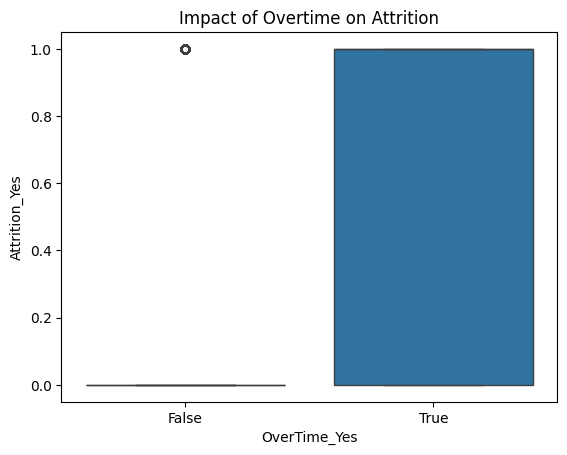

In [18]:
if "OverTime_Yes" in df.columns and "Attrition_Yes" in df.columns:
    sns.boxplot(x="OverTime_Yes", y="Attrition_Yes", data=df)
    plt.title("Impact of Overtime on Attrition")
    plt.show()

> Question 9: What is the expected salary of an employee based on their department, experience, and job role?

In [19]:
if "Salary" in df.columns:
    salary_features = [col for col in df.columns if "Department" in col or "JobRole" in col] + ["YearsAtCompany", "Education"]
    salary_model = train_regression_model(df, salary_features, "Salary")

🔍 Salary Mean Absolute Error: 35601.91
🔍 Salary R² Score: 0.72


---
### Stage 5: Predictions for New Employee

In [21]:
# Collect and validate new employee data
new_employee_data = get_new_employee_data(df, numerical_input_features, categorical_input_features, feature_ranges)


🔹 Enter new employee details:
❌ EnvironmentSatisfaction must be between 1 and 5.
OverTime options:
1. refers to 'Yes'
2. refers to 'No'
Department options:
1. refers to 'Human Resources'
2. refers to 'Sales'
3. refers to 'Technology'
JobRole options:
1. refers to 'Analytics Manager'
2. refers to 'Data Scientist'
3. refers to 'Engineering Manager'
4. refers to 'HR Business Partner'
5. refers to 'HR Executive'
6. refers to 'HR Manager'
7. refers to 'Machine Learning Engineer'
8. refers to 'Manager'
9. refers to 'Recruiter'
10. refers to 'Sales Executive'
11. refers to 'Sales Representative'
12. refers to 'Senior Software Engineer'
13. refers to 'Software Engineer'


### Make predictions for new employee

In [22]:
if "Attrition_Yes" in df.columns:
    turnover_pred = turnover_model.predict(new_employee_data[turnover_features])[0]
    print("\n🚨 Attrition Likelihood (Q1 & Q3):", "Yes" if turnover_pred == 1 else "No")

if "YearsAtCompany" in df.columns:
    tenure_pred = max(tenure_model.predict(new_employee_data[tenure_features])[0], 0)
    print("\n🚀 Predicted Tenure (Years) (Q2):", round(tenure_pred, 2))

if "JobSatisfaction" in df.columns:
    satisfaction_pred = satisfaction_model.predict(new_employee_data[satisfaction_features])[0]
    print("\n😊 Predicted Job Satisfaction (1-5) (Q5):", satisfaction_pred)

if promotion_column:
    promotion_pred = promotion_model.predict(new_employee_data[promotion_features])[0]
    print("\n🚀 Promotion Likelihood (Q6):", "Yes" if promotion_pred == 1 else "No")

if "Salary" in df.columns:
    salary_pred = salary_model.predict(new_employee_data[salary_features])[0]
    print("\n💰 Predicted Salary (Q9):", round(salary_pred, 2))


🚨 Attrition Likelihood (Q1 & Q3): Yes

🚀 Predicted Tenure (Years) (Q2): 1.72

😊 Predicted Job Satisfaction (1-5) (Q5): 4.0

🚀 Promotion Likelihood (Q6): No

💰 Predicted Salary (Q9): 204769.62
